# Data Source:

**"https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"**

# Problem Statement:

** *To reduce the dimensions of the dataset and to find out what features explain the most variance in the data. * **

# Data Dictionary:

The dataset has **178 rows**(samples/observations) and **14 columns**(attributes).

Below are the attributes:

'class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines','proline'

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Acquire Data

In [2]:
# Read the dataset

wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Add column names to the dataset

wine_df.columns = ['wine_class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                  'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
                  'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines',
                  'proline']

In [4]:
wine_df.head()

,wine_class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Since PCA is an Unsupervised Learning technique, we will drop the Target variable ('wine_class') and then implement PCA on this data

In [5]:
wine_df = wine_df.drop(['wine_class'], axis=1)

In [6]:
print("Shape of the dataset: ", wine_df.shape)

Shape of the dataset:  (178, 13)


# Why PCA?

Since it is difficult to **visualize** high dimensional data, we can use PCA to find the first three principal components, and visualize the data in a 3-dimensional plot. It is also used for **data compression**. Before we do this, we have to rescale the data and bring it to standard normal distribution.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaled_data = scaler.fit_transform(wine_df)

We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

# Now we can transform this data to the first 3 principal components.

X_pca = pca.transform(scaled_data)

In [12]:
# Shape of Original dataset (after dropping target variable 'wine_class')

scaled_data.shape

(178, 13)

In [13]:
# Shape of PCA-transformed new dataset

X_pca.shape

(178, 3)

##### Observation: From 13 dimensions we have reduced to 3 dimensions

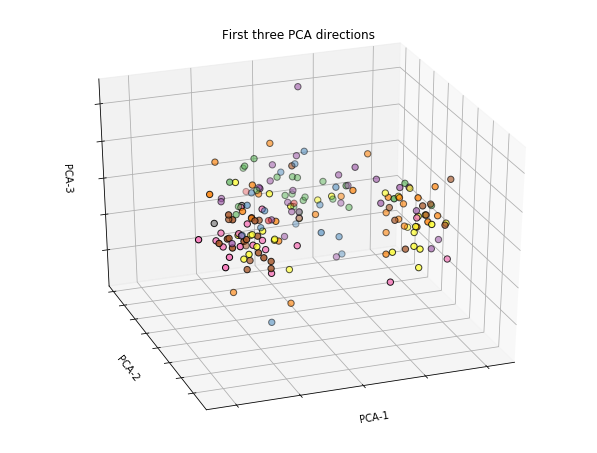

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=wine_df.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("PCA-1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PCA-2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PCA-3")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Interpreting the components 

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [15]:
df_comp = pd.DataFrame(pca.components_, columns=wine_df.columns)

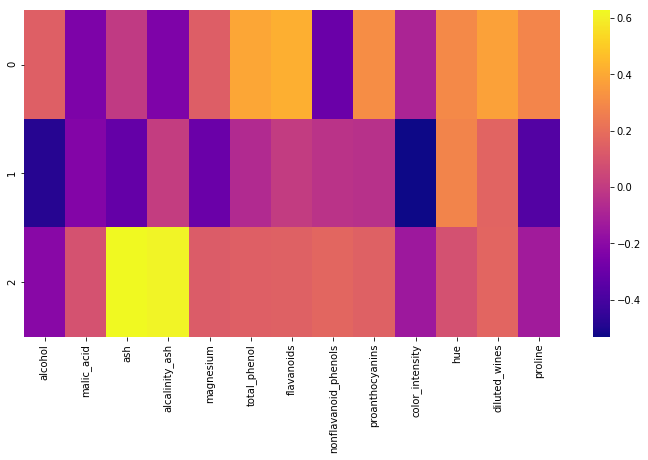

In [16]:
"""The heatmap and the color bar basically represent the correlation between 
the various features and the principal component itself."""

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)